# Decision Tree / Random Forest

> 這次透過 Iris dataset 帶大家了解 Machine Learning 基本的流程，包含：
> 1. Data preprocessing
> 2. Validation Method
> 3. Model Construction
> 4. Model Evaluation
> 5. Prediction

## 資料簡介
安德森鳶尾花卉數據集（英文：Anderson's Iris data set），  
也稱鳶尾花卉數據集（英文：Iris flower data set）
或費雪鳶尾花卉數據集（英文：Fisher's Iris data set），  
是一類多重變量分析的數據集。它最初是埃德加·  
安德森從加拿大加斯帕半島上的鳶尾屬花朵中提取的形態學變異數據，  
後由羅納德·費雪作為判別分析的一個例子，運用到統計學中。  

其數據集包含了150個樣本，都屬於鳶尾屬下的三個亞屬，  
分別是山鳶尾、變色鳶尾和維吉尼亞鳶尾。四個特徵被用作樣本的定量分析，  
它們分別是花萼和花瓣的長度和寬度。基於這四個特徵的集合，  
費雪發展了一個線性判別分析以確定其屬種。  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html)
    * [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    * [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    * [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

## I. Load Data

#### 請使用 [`datasets.load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) 將資料讀入

In [5]:
from sklearn.datasets import load_iris
data1=load_iris()
data1

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### 請使用 python 內建的 [`type`](https://docs.python.org/3/library/functions.html#type) function 取得 `iris` 的資料型態

In [6]:
type(data1)

sklearn.utils.Bunch

> 根據 document 的說明，回傳的資料是 sklearn.utils 定義的 `Bunch` 型態，特徵為 **Dictionary-like**  
> 因此我們可以使用 `dict` 的操作方式取得其中的資料

### Data

#### 請使用 `dict` 及 numpy array 操作，將 `iris` 中 data 的前 10 個 **row** 印出

In [7]:
arr=data1['data'][:11,:11]
arr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2]])

#### 請印出 `data` 部分的 [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [8]:
data1['data'].shape

(150, 4)

> 根據以上的資訊，可以看出 iris dataset 具有 150 筆 **instance (record)** ，而每個 instance 具有 4 個 **feature(attribute)**   
> 而根據資料說明，此 4 個 feature 的意義為 花萼長/寬 以及 花瓣長/寬

#### 請使用 `dict` 及 numpy array 操作，將 `iris` 中的 target 印出

In [11]:
target1=data1['target']
target1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

> 此 dataset 為一 classfication task，  
> 資料中的 **target（或稱 label）**即為資料中的預計作為預測的分類，  
> 根據資料說明： 0, 1, 2 分別代表其中一個種類的花

---

## II. Data Visualization

#### 請使用 `pyplot` 將 4 個 feature 的 [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) 畫至同一張 plot
* Hint: `label`, `plt.legend`, `alpha`

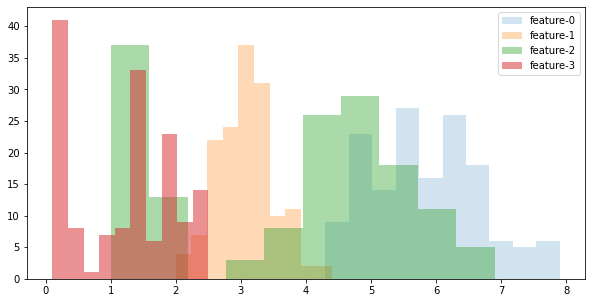

In [9]:
plt.figure(figsize=(10, 5))

'''Your Code Here'''
plt.hist(data1['data'][:150,0],alpha=0.2,label='feature-0',bins=10)
plt.hist(data1['data'][:150,1],alpha=0.3,label='feature-1')
plt.hist(data1['data'][:150,2],alpha=0.4,label='feature-2')
plt.hist(data1['data'][:150,3],alpha=0.5,label='feature-3')
plt.legend()

#### 請使用 `pyplot` 以 scatter plot 將前兩個 feature 畫出，並以 target 作為顏色區分三種分類

* Hint: `plt.scatter`, `c`

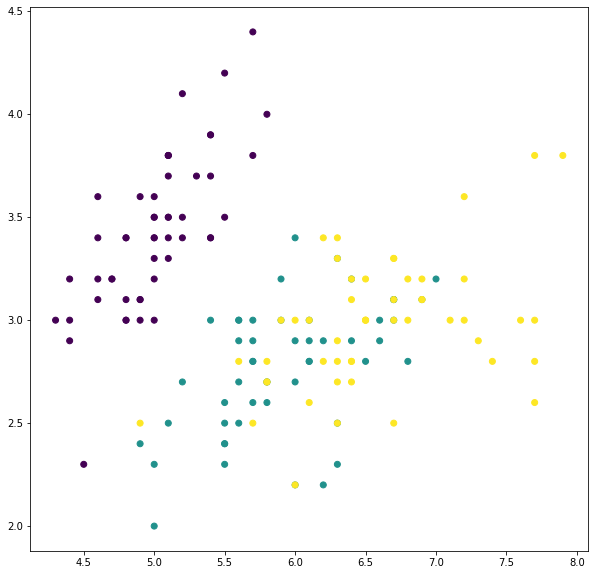

In [13]:
plt.figure(figsize=(10, 10))
'''Your Code Here'''
plt.scatter(data1['data'][:150,0],data1['data'][:150,1],c=target1)

> 藉由散佈圖，我們可以發現紫色的類別僅使用前兩個 feature 便可以與其他兩類分開

---

## III. Data Preprocessing & Validation Method

* 因為這次使用的資料已經經過處理，便不需要什麼特別的 preprocessing。
* 普遍的 preprocessing 有：
    * 型態轉換
    * Missing value 補齊（`imputer`）
    * 刪除不必要的 column（如 id 等）
    * 增加人工產生的 feature
    
#### 將 `data` 以及 `target` 的部分取出，分別使用慣用的 `X` 以及 `y` 代表
* ML 領域沿用線性代數的慣例，因此 `y` 會是小寫

In [14]:
X = data1['data']
y = data1['target']

X[:10], y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, train_size=0.7, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

#### Holdout Validation - 請使用 [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 將 `X` 及 `y` 分為 training set 以及 testing set.
* 此次 Validation Method 使用 7:3 Holdout Validation，意即將資料筆數的 $\frac{7}{10}$ 作為 **training set**，$\frac{3}{10}$ 作為 **testing set**
    * **training set** 僅用來訓練模型（model)
    * **testing set** 不加入訓練，而作為訓練完的模型評估效果使用
* `train_test_split` 中提供 `random_state` 參數，若給定的話每次的分割都會是相同的，方便實驗

---

## IV. Model Construction & Evaluation

以下將分別針對 [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 以及 [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 進行 training 以及 evaluation

`sklearn` 中提供的 model 皆提供相同的 member methods，因此即使使用不同 model 也可以快速訓練並得到結果
* `fit` - 訓練模型，需同時提供 `X` 以及 `y`
* `predict` - 使用模型對 `X` 進行預測
* `score` - 針對 classfication task，計算 `X` 及 `y` 以得到準確率（accuracy）


#### 請建構一個 `DecisionTreeClassfier` 及一個 `RandomForestClassfier` 並使用 `X_train` 及 `y_train` 進行訓練

(DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0,
                        splitter='random'),
 RandomForestClassifier(random_state=0))

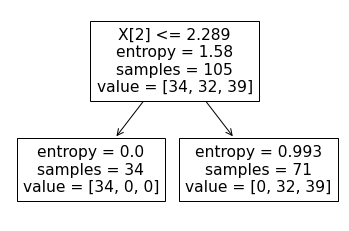

In [35]:
dt_clf = DecisionTreeClassifier(
            random_state=0,#Controls the randomness of the estimato
            criterion='entropy',#The function to measure the quality of a split
            splitter = 'random',#The strategy used to choose the split at each node. 
                                #Supported strategies are “best” to choose the best split and “random” to choose the best random split.
            max_depth = 1,#The maximum depth of the tree.限制樹的深度
                          #If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
            min_samples_split = 2 #The minimum number of samples 
            )

rf_clf = RandomForestClassifier(random_state=0)

'''Your Code Here'''
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
from sklearn.tree import plot_tree
plot_tree(dt_clf)
dt_clf, rf_clf

#### 請使用 [`classfication_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) 印出兩個模型的在 testing set 的 accuracy, precision, recall, f1

In [32]:
print('Decision Tree:')
print(classification_report(dt_clf.predict(X_test),y_test))

print('Random Forest:')
print(classification_report(rf_clf.predict(X_test),y_test))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00         0
           2       1.00      0.38      0.55        29

    accuracy                           0.60        45
   macro avg       0.67      0.46      0.52        45
weighted avg       1.00      0.60      0.71        45

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



C:\Users\Shen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 請使用 [`plot_confusion_matrix`](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) 畫出 model 在 testing set 的 confusion matrix
* Hint: [改變圖的大小](https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa)

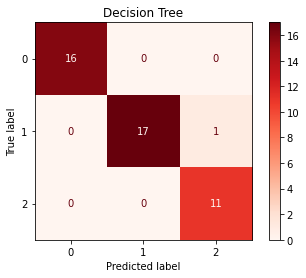

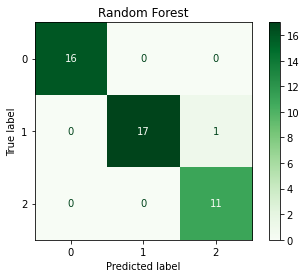

In [114]:
dsp=plot_confusion_matrix(dt_clf, X_test, y_test,cmap=plt.cm.Reds)
dsp.ax_.set_title('Decision Tree')
plt.show()

dsp=plot_confusion_matrix(rf_clf, X_test, y_test,cmap=plt.cm.Greens)
dsp.ax_.set_title('Random Forest')
plt.show()

> 有了 testing set 下的 evaluation，我們才可以正確的評估 model 的效果，  
> 並避開了可能的 **overfitting** 問題。

---

## V. Prediction

有了 model 後，我們將可以對新的資料進行預測

#### 請使用 `rf_clf` 對新量測到的資料 `X_new` 進行預測
* Hint: 注意輸入的 shape

In [99]:
X_new = [5.1, 3.2, 1.4, 0.2]

print(rf_clf.predict([X_new]))

[0]


> 在未來我們僅需要量測四個 feature 數值，便可以預測出花的種類